# Quantiles

Quantiles are points that split a dataset into groups of equal size. For example, let us say you just took a test and wanted to know whether you are in the top 10% of the class. One way to determine this would be to split the data into ten groups with an equal number of datapoints in each group and see which group you fall into.

<img src="https://content.codecademy.com/courses/statistics/quantiles/deciles.svg" alt="Thirty students grades split into ten groups of three." style="background-color:white;"></img><br>

There are nine values that split the dataset into ten groups of equal size — each group has 3 different test scores in it.

Those nine values that split the data are quantiles! Specifically, they are the 10-quantiles, or deciles.

You can find any number of quantiles. For example, if you split the dataset into 100 groups of equal size, the 99 values that split the data are the 100-quantiles, or percentiles.

The quartiles are some of the most commonly used quantiles. The quartiles split the data into four groups of equal size.

In this lesson, we’ll show you how to calculate quantiles using NumPy and discuss some of the most commonly used quantiles.

***

### Exercise

We have imported a dataset of song lengths (measured in seconds). We have drawn a few histograms showing different quantiles.

What do you think a histogram that shows the 100-quantiles would look like?

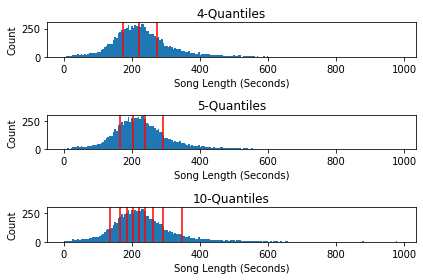

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

with open('songs.json', 'r') as json_file:
  imported_data = json.load(json_file)

songs = imported_data['songs']

q1 = np.quantile(songs, 0.25)
q2 = np.quantile(songs, 0.5)
q3 = np.quantile(songs, 0.75)

plt.subplot(3,1,1)
plt.hist(songs, bins = 200)
plt.axvline(x=q1, c = 'r')
plt.axvline(x=q2, c = 'r')
plt.axvline(x=q3, c = 'r')
plt.xlabel("Song Length (Seconds)")
plt.ylabel("Count")
plt.title("4-Quantiles")

plt.subplot(3,1,2)
plt.hist(songs, bins = 200)
plt.axvline(x=np.quantile(songs, 0.2), c = 'r')
plt.axvline(x=np.quantile(songs, 0.4), c = 'r')
plt.axvline(x=np.quantile(songs, 0.6), c = 'r')
plt.axvline(x=np.quantile(songs, 0.8), c = 'r')
plt.xlabel("Song Length (Seconds)")
plt.ylabel("Count")
plt.title("5-Quantiles")

plt.subplot(3,1,3)
plt.hist(songs, bins = 200)
for i in range(1, 10):
  plt.axvline(x=np.quantile(songs, i/10), c = 'r')
plt.xlabel("Song Length (Seconds)")
plt.ylabel("Count")
plt.title("10-Quantiles")

plt.tight_layout()
plt.show()

***

## Quantiles in NumPy

The NumPy library has a function named `quantile()` that will quickly calculate the quantiles of a dataset for you.

`quantile()` takes two parameters. The first is the dataset that you are using. The second parameter is a single number or a list of numbers between `0` and `1`. These numbers represent the places in the data where you want to split.

For example, if you only wanted the value that split the first 10% of the data apart from the remaining 90%, you could use this code:

    import numpy as np
 
    dataset = [5, 10, -20, 42, -9, 10]
    ten_percent = np.quantile(dataset, 0.10)

`ten_percent` now holds the value `-14.5`. This result _technically_ is not a quantile, because it is not splitting the dataset into groups of equal sizes — this value splits the data into one group with 10% of the data and another with 90%.

However, it would still be useful if you were curious about whether a data point was in the bottom 10% of the dataset.

***

1. The dataset containing information about the lengths of songs is stored in a variable named `songs`.

    Create a variable named `twenty_third_percentile` that contains the value that splits the first 23% of the data from the rest of the data.

In [4]:
twenty_third_percentile = np.quantile(songs, 0.23)

In [6]:
# Run this cell once you are done
try:
  print(f"The value that splits 23% of the data is {twenty_third_percentile}\n")
except NameError:
  print("You have not defined twenty_third_percentile.")

The value that splits 23% of the data is 171.7812924



***

## Many Quantiles

In the last exercise, we found a single "quantile" — we split the first 23% of the data away from the remaining 77%.

However, quantiles are usually a set of values that split the data into groups of equal size. For example, you wanted to get the 5-quantiles, or the four values that split the data into five groups of equal size, you could use this code:

    import numpy as np
 
    dataset = [5, 10, -20, 42, -9, 10]
    ten_percent = np.quantile(dataset, [0.2, 0.4, 0.6, 0.8])

Note that we had to do a little math in our head to make sure that the values $[0.2, 0.4, 0.6, 0.8]$ split the data into groups of equal size. Each group has 20% of the data.

<img src="https://content.codecademy.com/courses/statistics/quantiles/deciles.svg" alt="The data is split into 5 groups where each group has 4 datapoints." style="background-color:white;"></img><br>

If we used the values $[0.2, 0.4, 0.7, 0.8]$, the function would return the four values at those split points. However, those values wouldn’t split the data into five equally sized groups. One group would only have 10% of the data and another group would have 30% of the data!
The data is split into groups of uneven size.

<img src="https://content.codecademy.com/courses/statistics/quantiles/deciles.svg" alt="One group has 6 data points and one group only has 2." style="background-color:white;"></img><br>

***

### Exercise

1. Create a variable named `quartiles` that contains the quartiles of the `songs` dataset.

    The quartiles of a dataset split the data into four groups of equal size. Each group should have 25% of the data, so you will want to use $[0.25, 0.5, 0.75]$ as the second parameter to the `quantile()` function.

In [7]:
quartiles = np.quantile(songs, [0.25, 0.5, 0.75])

2. Create a variable named `deciles`. `deciles` should store the values that split the dataset into ten groups of equal size. Each group should have 10% of the data.

    The first value should be at 10% of the data. The next value should be at 20% of the data. The final value should be at 90% of the data.

In [8]:
tenths = [i / 10 for i in range(1,10)]
deciles = np.quantile(songs, tenths)

In [9]:
# Run this cell once you are done with 1. and 2.
try:
  print(f"The quariles are {quartiles}\n")
except NameError:
  print("You have not defined quartiles.\n")
try:
  print(f"The deciles are {deciles}\n")
except NameError:
  print(f"You have not defined deciles.\n")

The quariles are [175.93424 222.82404 275.47383]

The deciles are [135.151876 165.375546 185.99138  204.815222 222.82404  240.22159
 262.47791  290.95138  348.493912]



3. Look at the printout of the deciles. If you had a song that was `170` seconds long, what tenth of the dataset would it fall in?

    Create a variable named tenth and set it equal to the `1` if you think the `170` second song would fall in the first tenth of the data. Set it equal to `2` if you think the song would fall in the second tenth of the data. If you think the song would fall in the final `tenth` of the data, set tenth equal to `10`.

In [10]:
tenth = 3

***

## Common Quantiles

One of the most common quantiles is the 2-quantile. This value splits the data into two groups of equal size. Half the data will be above this value, and half the data will be below it. This is also known as the median!

<img src="https://content.codecademy.com/courses/statistics/quantiles/median.svg" alt="Ten points are below the median and ten points are above the median." style="background-color:white;"></img><br>

The 4-quantiles, or the quartiles, split the data into four groups of equal size. We found the quartiles in the previous exercise. Options

<img src="https://content.codecademy.com/courses/statistics/quantiles/quartiles.svg" alt="Quartiles split a dataset of 20 points into 4 groups with 5 points each." style="background-color:white;"></img><br>

Finally, the percentiles, or the values that split the data into 100 groups, are commonly used to compare new data points to the dataset. You might hear statements like "You are above the 80th percentile in height". This means that your height is above whatever value splits the first 80% of the data from the remaining 20%.

***

1. We will not make you calculate all 99 percentiles, but let zs take a look at one. Find the value that separates the first 32% of the data from the rest.

    Store that value in a variable named `percentile`.

In [11]:
percentile = np.quantile(songs, 0.32)

In [12]:
# Run this cell once you are done with 1.
try:
  print("Your percentile is " + str(percentile) + "\n")
except NameError:
  print("You haven't defined percentile")

Your percentile is 189.93587000000002



2. Look at the printout. If you had a song that was exactly three minutes long, is that song above or below the 32nd percentile?

    Create a variable named `answer` and set it equal to either `"above"` or `"below"`. Do not forget to include the quotes!

In [13]:
answer = "below"

Quantiles Review

Nice work! Here are some of the major takeaways about quantiles:

* Quantiles are values that split a dataset into groups of equal size.
* If you have n quantiles, the dataset will be split into n+1 groups of equal size.
* The median is a quantile. It is the only 2-quantile. Half the data falls below the median and half falls above the median.
* Quartiles and percentiles are other common quantiles. Quartiles split the data into 4 groups while percentiles split the data into 100 groups.

***

### Optional
Below, we have shown three different histograms along with the deciles. Each histogram shows the SAT scores of the students that a _fake_ university has accepted.

If you had an SAT score of `1350`, which tenth of the data would you be in for each school? Which schools should you apply to? Would any of the schools be unrealistic options?

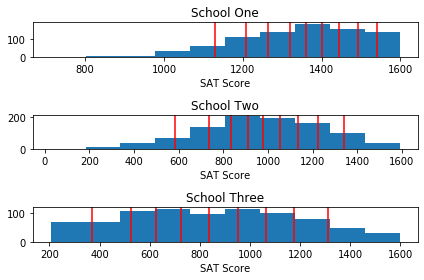

In [14]:
a = np.random.normal(1400, 200, 1000)
school_one = [x for x in a if x <= 1600]

b = np.random.normal(1000, 300, 1000)
school_two = [x for x in b if x <= 1600]

c = np.random.normal(800, 500, 1000)
school_three = [x for x in c if x <= 1600 and x >=200]

deciles_one = np.quantile(school_one, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
deciles_two = np.quantile(school_two, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
deciles_three = np.quantile(school_three, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.subplot(311)
plt.hist(school_one)
for decile in deciles_one:
  plt.axvline(x=decile, c = 'r')
plt.title("School One")
plt.xlabel("SAT Score")
  
plt.subplot(312)
plt.hist(school_two)
for decile in deciles_two:
  plt.axvline(x=decile, c = 'r')
plt.title("School Two")
plt.xlabel("SAT Score")
  
plt.subplot(313)
plt.hist(school_three)
for decile in deciles_three:
  plt.axvline(x=decile, c = 'r')
plt.title("School Three")
plt.xlabel("SAT Score")
plt.tight_layout()
plt.show()